## Import

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

## Fonts

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

## Read csv

In [15]:
# Read csv

# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949', sep=',')

## 날짜 파싱

In [16]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')

# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

# 달 포기
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

# 일 표기
data['day'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%d')

# 1. 월 별 사망 사고 비율
## 데이터 전처리 [ Fix ]

In [5]:
# 월 별 인명피해(소계, 사망, 부상), 재산 피해 소계, 발생 회수 데이터프레임
df_sumByMonth = data.groupby(data['onlyMonth']).sum()

# 월 별 화재 발생 회수 카운트 데이터프레임
df_cntFireOccur= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [6]:
# df_sumByMonth에 월 별 발생 회수 넣기
df_sumByMonth['발생회수'] = data['onlyMonth'].groupby(data['onlyMonth']).count()

## 시각화 ( Graph )

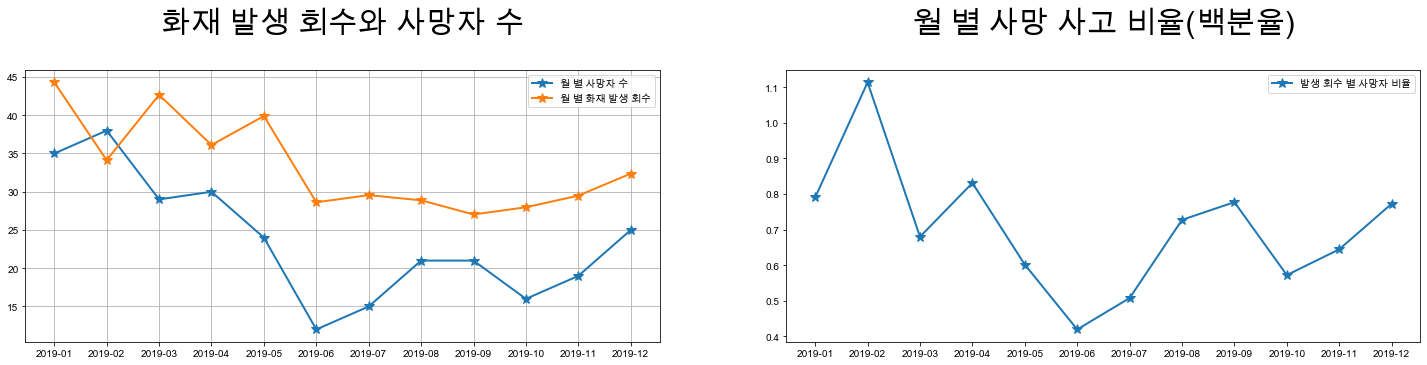

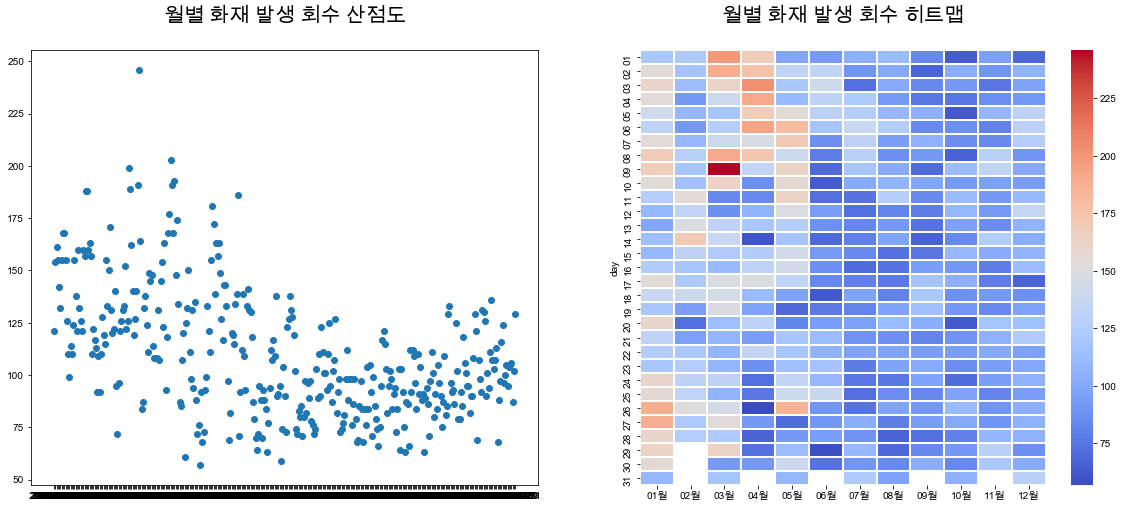

<Figure size 720x720 with 0 Axes>

In [8]:
# Figure 1
# 월 별 사고 발생과 사망 회수 그래프

# Figure 지정
plt.figure(figsize=(25,5))

#  첫 번째 그래프 위치 지정
plt.subplot(121)
# 피규어 내의 첫 번째 그래프 - 월 별 사망자 수 그래프
plt.plot(df_sumByMonth.index, df_sumByMonth['사망'], marker='*',markersize=10,linewidth=2, label='월 별 사망자 수')
# 피규어 내의 두 번째 그래프 - 월 별 화재 발생 회수 그래프
plt.plot(df_sumByMonth.index, df_sumByMonth['발생회수']/100, marker='*',markersize=10,linewidth=2, label='월 별 화재 발생 회수')
# 그래프 설정
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('화재 발생 회수와 사망자 수\n', size=30)

# 두 번째 그래프 위치 지정
plt.subplot(122)

# 발생 회수에 따른 사망률 백분율 그래프
plt.plot(df_sumByMonth.index, (df_sumByMonth['사망']/df_sumByMonth['발생회수'])*100, marker='*',markersize=10,linewidth=2, label='발생 회수 별 사망자 비율')
plt.legend()
plt.xlabel(u'')
plt.title('월 별 사망 사고 비율(백분율)\n', size=30)



# Figure 2
# 월/일별 화재 발생 회수

# Figure 생성
figure2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))


# 월 / 일별 화재 발생 회수 산점도
df_Cnt = data.groupby(data['onlyDay']).sum().iloc[:,[1,2]]
df_Cnt['발생회수'] = data['onlyDay'].groupby(data['onlyDay']).count()
ax1.scatter(df_Cnt.index, df_Cnt['발생회수'])
ax1.set_title('월별 화재 발생 회수 산점도\n', size=20)

# 데이터 전처리ㄴ
df_DayCount = pd.DataFrame()
monthFilter = ['01월','02월','03월','04월','05월','06월','07월','08월','09월','10월','11월','12월']
for i in monthFilter:
    mask = ( data.month== i )
    df_temp = data.loc[mask, ['사망']].groupby(data['day']).count()
    df_DayCount = df_DayCount.append(df_temp.T)
df_DayCount.index = monthFilter
plt.figure(figsize=(10,10))

ax2.set_title('월별 화재 발생 회수 히트맵\n', size=20)
sns.heatmap(df_DayCount.T, linewidths=1,cmap='coolwarm', ax=ax2)

# 2. 화재 유형 별 발생 비율과 재산 피해 비율
## 데이터 전처리 [ Fix ]

In [9]:
# Create DataFrame
df_dmgPerCase = data.groupby(data['화재유형']).sum()

# 화재 유형 별 화재 발생 건수
df_dmgPerCase['count'] = data['화재유형'].groupby(data['화재유형']).count()

# 화재 유형 별 건당 피해 액 수
df_dmgPerCase['건당피해'] = df_dmgPerCase['재산피해소계']/df_dmgPerCase['count']

# 필요한 열만 잘라내기
df_dmgPerCase = df_dmgPerCase.iloc[:,[0,3,4,5]]

# 정렬
df_srtDmgPerCase = df_dmgPerCase.sort_values('건당피해', ascending=False)

# 출력
df_srtDmgPerCase

,인명피해(명)소계,재산피해소계,count,건당피해
화재유형,,,,
"선박,항공기",27,60005851,108,555609.731481
"위험물,가스제조소등",19,6805927,29,234687.137931
임야,133,198547953,2211,89800.069199
"건축,구조물",1993,552840022,26025,21242.652142
"자동차,철도차량",177,32663468,4710,6934.918896
기타(쓰레기 화재등),166,7633013,7020,1087.323789


## 시각화 ( Pie )

Text(0, 0.5, '')

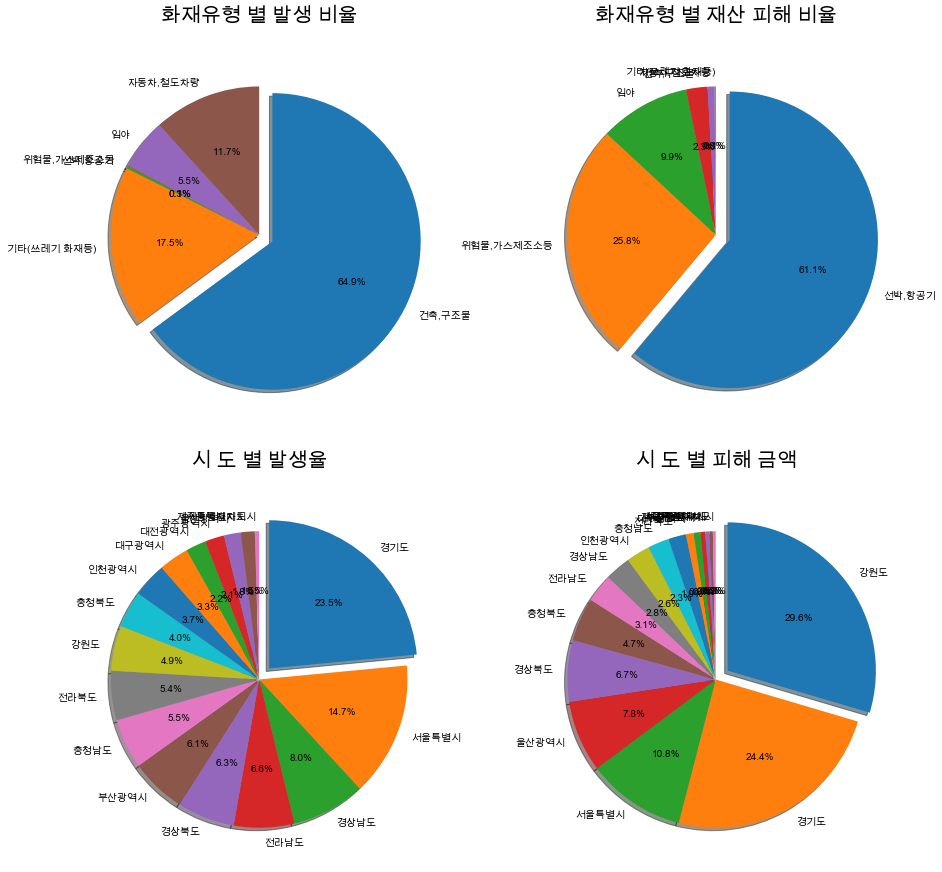

In [10]:
# 피규어 생성
fig1= plt.figure()

# 1행 차트

# 파이 노출도 설정
explode_value = (0.1, 0, 0, 0, 0, 0)

# 첫 번째 파이 위치 설정
ax1 = fig1.add_subplot(221)
# 첫 번째 파이 그리기
firepie = df_dmgPerCase['count'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax1)
firepie.set_title("화재유형 별 발생 비율\n", fontsize=20)
firepie.set_ylabel("")

# 두 번째 파이 위치 설정
ax2 = fig1.add_subplot(222)
# 두 번째 파이 그리기
damagepie = df_srtDmgPerCase['건당피해'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
damagepie.set_title("화재유형 별 재산 피해 비율\n", fontsize=20)
damagepie.set_ylabel("")


# 2행 차트

# 데이터 전처리
# 시도별 발생 회수
df_CntLoc=data['시도'].groupby(data['시도']).count()
df_CntLoc=df_CntLoc.sort_values(ascending=False)

# 시도별 재산피해소계 합산
df_DmgLoc=data['재산피해소계'].groupby(data['시도']).sum()
df_DmgLoc=df_DmgLoc.sort_values(ascending=False)


# 세 번째 파이 위치 설정
ax3 = fig1.add_subplot(223)
# 두 번째 행 파이 노출도 설정
explode_value = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# 세 번째 파이 그리기
locOccrPie = df_CntLoc.plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
locOccrPie.set_title("시 도 별 발생율\n", fontsize=20)
locOccrPie.set_ylabel("")

# 네 번째 파이 위치 설정
ax4 = fig1.add_subplot(224)
# 네 번째 파이 그리기
locDmgPie = df_DmgLoc.plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax4)
locDmgPie.set_title("시 도 별 피해 금액\n", fontsize=20)
locDmgPie.set_ylabel("")

# 3. 착화물 별 데이터

## 데이터 전처리

In [11]:
# 발화 열원 대분류

# 발화 열원 대분류 발생 데이터프레임
df_ignitionLargeOccr=data['발화열원대분류'].groupby(data['발화열원대분류']).count()
df_ignitionLargeOccr=df_ignitionLargeOccr.sort_values(ascending=False)

# 발화 열원 대분류 재산피해
df_ignitionLargeDmg=data['재산피해소계'].groupby(data['발화열원대분류']).sum()
df_ignitionLargeDmg=df_ignitionLargeDmg.sort_values(ascending=False)

# 발화 열원 대분류 사망률
df_ignitionLargeDeath = data['사망'].groupby(data['발화열원대분류']).sum()
df_ignitionLargeDeath = df_ignitionLargeDeath.sort_values(ascending=False)


# 발화 요인 대분류

# 발화 요인 대분류 발생 데이터프레임
df_ignitionFactorOccr=data['발화요인대분류'].groupby(data['발화요인대분류']).count()
df_ignitionFactorOccr=df_ignitionFactorOccr.sort_values(ascending=False)

# 발화 요인 대분류 재산피해
df_ignitionFactorDmg=data['재산피해소계'].groupby(data['발화요인대분류']).sum()
df_ignitionFactorDmg=df_ignitionFactorDmg.sort_values(ascending=False)

# 발화 요인 대분류 사망률
df_ignitionFactorDeath = data['사망'].groupby(data['발화요인대분류']).sum()
df_ignitionFactorDeath = df_ignitionFactorDeath.sort_values(ascending=False)


# 최초 착화물 대분류

# 최초 착화물 대분류 발생 데이터 프레임
df_ignitionComplexOccr=data['최초착화물대분류'].groupby(data['최초착화물대분류']).count()
df_ignitionComplexOccr=df_ignitionComplexOccr.sort_values(ascending=False)

# 최초 착화물 대문류 재산피해
df_ignitionComplexDmg=data['재산피해소계'].groupby(data['최초착화물대분류']).sum()
df_ignitionComplexDmg=df_ignitionComplexDmg.sort_values(ascending=False)

# 최초 착화물 대분류 사망률
df_ignitionComplexDeath = data['사망'].groupby(data['최초착화물대분류']).sum()
df_ignitionComplexDeath = df_ignitionComplexDeath.sort_values(ascending=False)

# 시각화 [ Pie ]

Text(0, 0.5, '')

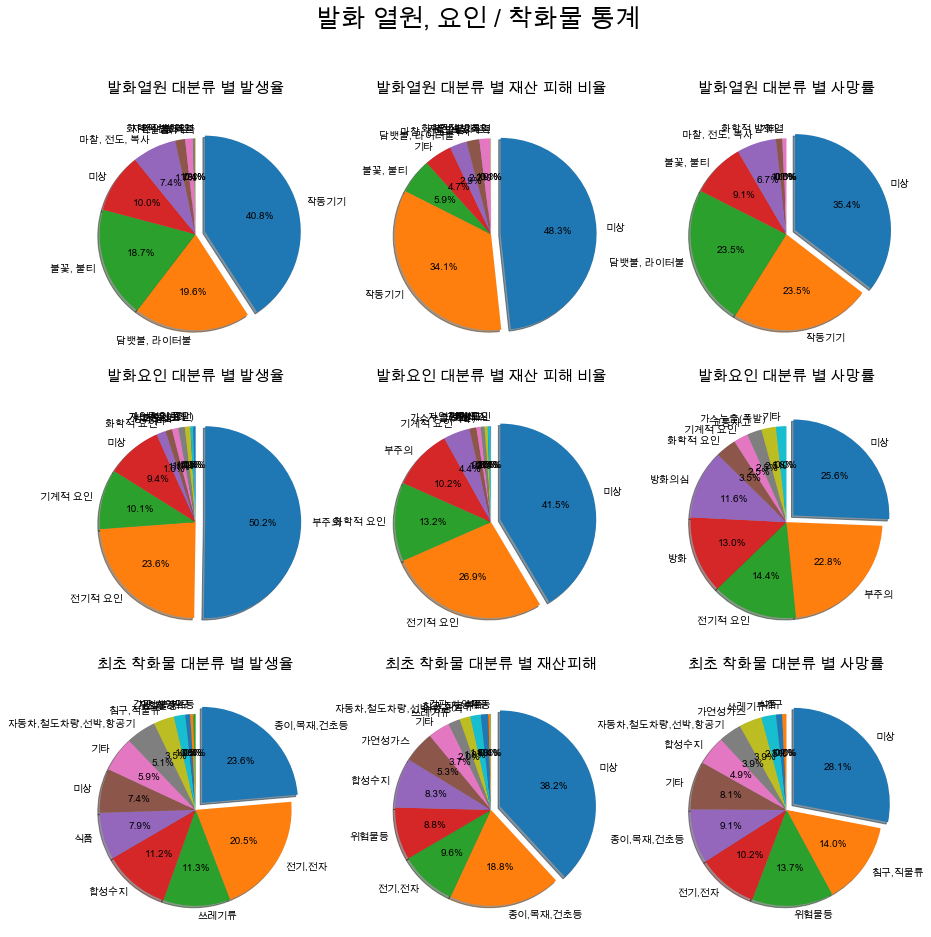

In [12]:
# Make figure
fig4= plt.figure()
fig4.suptitle('발화 열원, 요인 / 착화물 통계',fontsize=25)

# 파이 위치 설정
ax1 = fig4.add_subplot(331)
ax2 = fig4.add_subplot(332)
ax3 = fig4.add_subplot(333)

ax4 = fig4.add_subplot(334)
ax5 = fig4.add_subplot(335)
ax6 = fig4.add_subplot(336)

ax7 = fig4.add_subplot(337)
ax8 = fig4.add_subplot(338)
ax9 = fig4.add_subplot(339)

# 파이 그래프 강조 값 설정
explode_value = (0.1,0,0,0,0,0,0,0,0)

# 첫 번째 행

# 첫 번째 파이 - 발화 열원 대분류 별 발생량
ignitionLargeOccrPie= df_ignitionLargeOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax1)
ignitionLargeOccrPie.set_title("발화열원 대분류 별 발생율\n", fontsize=15)
ignitionLargeOccrPie.set_ylabel("")

# 두 번째 파이 - 발화 열원 대분류 별 재산 피해 비율
ignitionLargeDmgPie= df_ignitionLargeDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax2)
ignitionLargeDmgPie.set_title("발화열원 대분류 별 재산 피해 비율\n", fontsize=15)
ignitionLargeDmgPie.set_ylabel("")

# 세 번째 파이 - 발화 열원 대분류 별 사망 비율
ignitionLargeDeathPie= df_ignitionLargeDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax3)
ignitionLargeDeathPie.set_title("발화열원 대분류 별 사망률\n", fontsize=15)
ignitionLargeDeathPie.set_ylabel("")


# 두 번째 행

explode_value = (0.1,0,0,0,0,0,0,0,0,0,0)

# 네 번째 파이 - 발화 요인 대분류 별 발생량
ignitionFactorOccrPie= df_ignitionFactorOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax4)
ignitionFactorOccrPie.set_title("발화요인 대분류 별 발생율\n", fontsize=15)
ignitionFactorOccrPie.set_ylabel("")

# 다섯 번째 파이 - 발화 열원 대분류 별 재산 피해 비율
ignitionFactorDmgPie= df_ignitionFactorDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax5)
ignitionFactorDmgPie.set_title("발화요인 대분류 별 재산 피해 비율\n", fontsize=15)
ignitionFactorDmgPie.set_ylabel("")

# 여섯 번째 파이 - 발화 열원 대분류 별 사망 비율
ignitionFactorDeathPie= df_ignitionFactorDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax6)
ignitionFactorDeathPie.set_title("발화요인 대분류 별 사망률\n", fontsize=15)
ignitionFactorDeathPie.set_ylabel("")


# 세 번째 행

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0)

# 일곱 번째 파이 - 최초 착화물 대분류 별 발생량
ignitionComplexOccrPie= df_ignitionComplexOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax7)
ignitionComplexOccrPie.set_title("최초 착화물 대분류 별 발생율\n", fontsize=15)
ignitionComplexOccrPie.set_ylabel("")

# 여덟 번째 파이 - 최초 착화물 대분류 별 재산피해
ignitionComplexDmgPie= df_ignitionComplexDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax8)
ignitionComplexDmgPie.set_title("최초 착화물 대분류 별 재산피해\n", fontsize=15)
ignitionComplexDmgPie.set_ylabel("")

# 아홉 번째 파이 - 최초 착화물 대분류 별 사망률
ignitionComplexDeathPie= df_ignitionComplexDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax9)
ignitionComplexDeathPie.set_title("최초 착화물 대분류 별 사망률\n", fontsize=15)
ignitionComplexDeathPie.set_ylabel("")

In [13]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,...,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth,month,day
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등",...,0,1,0,기타,야외,기타야외,2019-01-01,2019-01,01월,01
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,...,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01,01월,01
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,...,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01,01월,01
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등",...,0,0,1848,기타,야외,야적장,2019-01-01,2019-01,01월,01
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자",...,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01,01월,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",...,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12,12월,31
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",...,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12,12월,31
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,...,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12,12월,31
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,...,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12,12월,31


In [14]:
data.columns

Index(['화재발생년월일', '시도', '시·군·구', '읍면동', '화재유형', '발화열원대분류', '발화열원소분류',
       '발화요인대분류', '발화요인소분류', '최초착화물대분류', '최초착화물소분류', '인명피해(명)소계', '사망', '부상',
       '재산피해소계', '장소대분류', '장소중분류', '장소소분류', 'onlyDay', 'onlyMonth', 'month',
       'day'],
      dtype='object')